In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('./test_images/arshdeep_singh.jpeg')
img.shape

(225, 225, 3)

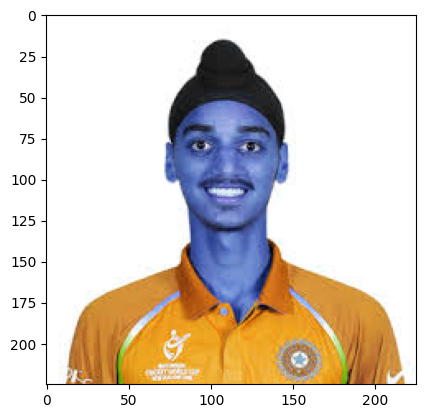

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(225, 225)

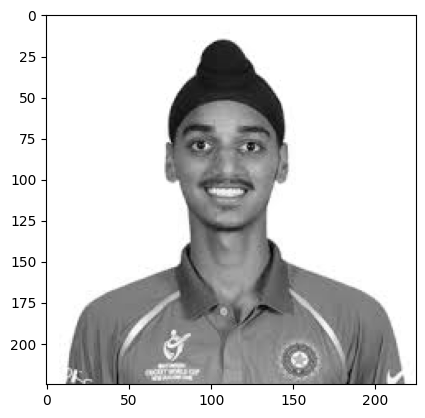

In [5]:
plt.imshow(gray, cmap='gray')

In [6]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[71, 49, 78, 78]])

In [7]:
(x,y,w,h) = faces[0]
x,y,w,h

(71, 49, 78, 78)

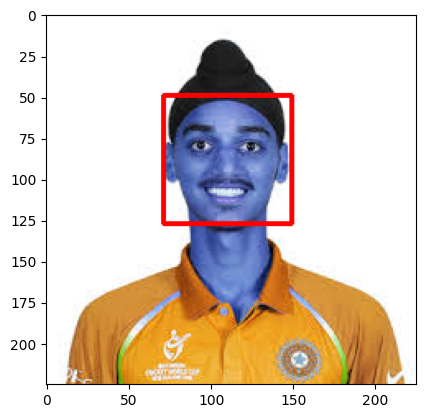

In [8]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

Detected 2 eye(s) in the face region.


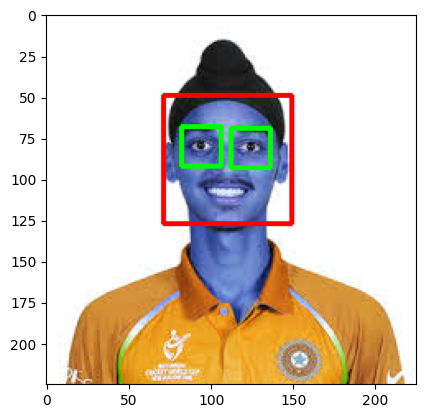

In [9]:
cv2.destroyAllWindows()
face_img = img.copy()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    
    # Check if eyes are detected
    if len(eyes) == 0:
        print("No eyes detected in the face region.")
    else:
        print(f"Detected {len(eyes)} eye(s) in the face region.")
        
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img, cmap='gray')
# plt.imshow(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB))
plt.show()

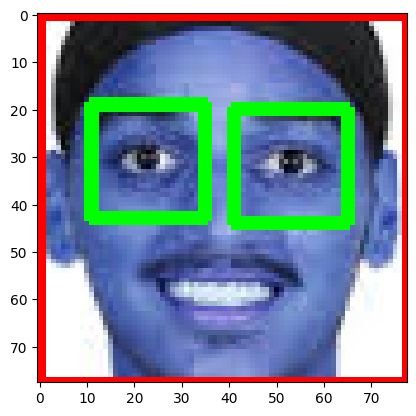

In [10]:
plt.imshow(roi_color, cmap='gray')

In [11]:
# def get_cropped_image_if_2_eyes(image_path):
#     img = cv2.imread(image_path)
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     faces = face_cascade.detectMultiScale(gray, 1.3,5)
#     for (x,y,w,h) in faces:
#         roi_gray = gray[y:y+h, x:x+w]
#         roi_color = img[y:y+h, x:x+w]
#         eyes = eye_cascade.detectMultiScale(roi_gray)
#         if (len(eyes)>=2):
#             return roi_color

In [12]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)

    if img is None:
        print(f"Failed to read image at path: {image_path}")
        return []
        
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3,5)

    faces_list = []
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if (len(eyes)>=2):
            faces_list.append(roi_color)

    return faces_list

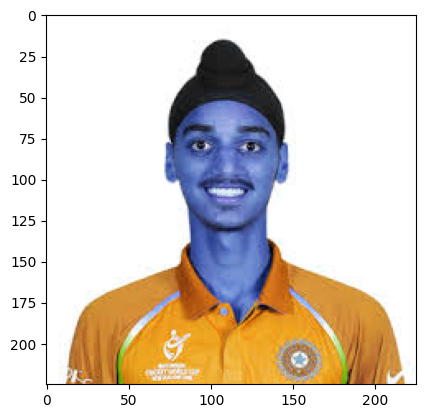

In [13]:
o_img = cv2.imread('./test_images/arshdeep_singh.jpeg')
plt.imshow(o_img)

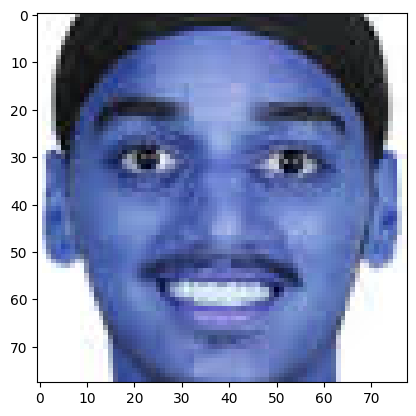

In [14]:
cropped_img = get_cropped_image_if_2_eyes('./test_images/arshdeep_singh.jpeg')
for c_img in cropped_img:
    
    plt.imshow(c_img)

In [15]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [16]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [17]:
img_dirs

['./dataset/Arshdeep Singh',
 './dataset/Axar Patel',
 './dataset/cropped',
 './dataset/Hardik Pandya',
 './dataset/Jasprit Bumrah',
 './dataset/Kuldeep Yadav',
 './dataset/Mohammed Siraj',
 './dataset/Ravindra Jadeja',
 './dataset/Rishabh Pant',
 './dataset/Rohit Sharma',
 './dataset/Sanju Samson',
 './dataset/Shivam Dube',
 './dataset/Suryakumar Yadav',
 './dataset/Virat Kohli',
 './dataset/Yashasvi Jaiswal',
 './dataset/Yuzvendra Chahal']

In [18]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)

os.mkdir(path_to_cr_data)

In [19]:
cropped_img_dirs = []
cricketers_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    cricketer_name = img_dir.split('/')[-1]

    cricketers_file_names_dict[cricketer_name] = []

    for entry in os.scandir(img_dir):
        print(f"Processing file: {entry.path}")
        roi_color_list = get_cropped_image_if_2_eyes(entry.path)
        for roi_color in roi_color_list:
            
            if roi_color is not None:
                cropped_folder = path_to_cr_data + cricketer_name
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_img_dirs.append(cropped_folder)
                    print("Generating cropped images in folder: ",cropped_folder)
    
                cropped_file_name = cricketer_name + str(count) + ".png"
                cropped_file_path = cropped_folder + "/" + cropped_file_name
    
                cv2.imwrite(cropped_file_path, roi_color)
                cricketers_file_names_dict[cricketer_name].append(cropped_file_path)
                count +=1

Processing file: ./dataset/Arshdeep Singh\Image_1.jpg
Processing file: ./dataset/Arshdeep Singh\Image_10.jpg
Generating cropped images in folder:  ./dataset/cropped/Arshdeep Singh
Processing file: ./dataset/Arshdeep Singh\Image_100.jpg
Processing file: ./dataset/Arshdeep Singh\Image_11.jpg
Processing file: ./dataset/Arshdeep Singh\Image_12.jpg
Processing file: ./dataset/Arshdeep Singh\Image_13.jpg
Processing file: ./dataset/Arshdeep Singh\Image_14.png
Processing file: ./dataset/Arshdeep Singh\Image_15.jpeg
Processing file: ./dataset/Arshdeep Singh\Image_16.png
Processing file: ./dataset/Arshdeep Singh\Image_17.jpg
Processing file: ./dataset/Arshdeep Singh\Image_18.jpg
Processing file: ./dataset/Arshdeep Singh\Image_19.jpg
Processing file: ./dataset/Arshdeep Singh\Image_2.jpg
Processing file: ./dataset/Arshdeep Singh\Image_20.jpg
Processing file: ./dataset/Arshdeep Singh\Image_21.png
Processing file: ./dataset/Arshdeep Singh\Image_22.jpg
Processing file: ./dataset/Arshdeep Singh\Image_2

In [20]:
# cropped_img_dirs = []
# cricketers_file_names_dict = []

# for img_dir in img_dirs:
#     count = 1
#     cricketer_name = img_dir.split('/')[-1]

#     for entry in os.scandir(img_dir):
#         roi_color = get_cropped_image_if_2_eyes(entry.path)
#         if roi_color is not None:
#             cropped_folder = path_to_cr_data + cricketer_name
#             if not os.path.exists(cropped_folder):
#                 os.makedirs(cropped_folder)
#                 cropped_img_dirs.append(cropped_folder)
#                 print("Generating cropped images in folder: ",cropped_folder)

#             cropped_file_name = cricketer_name + str(count) + ".png"
#             cropped_file_path = cropped_folder + "/" + cropped_file_name

#             cv2.imwrite(cropped_file_path, roi_color)
#             count +=1

***PREPROCESSING: FEATURE EXTRACTION***

In [21]:
cropped_img = np.array(roi_color)
cropped_img.shape

(151, 151, 3)

In [43]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

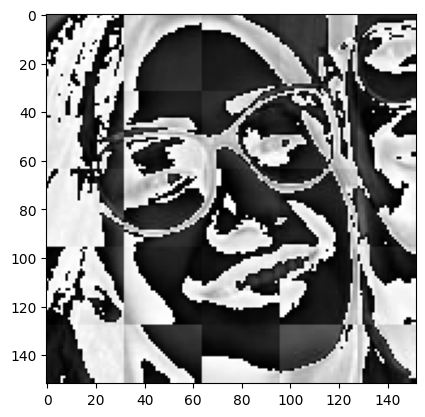

In [44]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [45]:
class_dict = {}
count = 0
for cricketer_name in cricketers_file_names_dict.keys():
    class_dict[cricketer_name] = count
    count = count + 1
class_dict

{'Arshdeep Singh': 0,
 'Axar Patel': 1,
 'cropped': 2,
 'Hardik Pandya': 3,
 'Jasprit Bumrah': 4,
 'Kuldeep Yadav': 5,
 'Mohammed Siraj': 6,
 'Ravindra Jadeja': 7,
 'Rishabh Pant': 8,
 'Rohit Sharma': 9,
 'Sanju Samson': 10,
 'Shivam Dube': 11,
 'Suryakumar Yadav': 12,
 'Virat Kohli': 13,
 'Yashasvi Jaiswal': 14,
 'Yuzvendra Chahal': 15}

In [46]:
X, y = [], []
for cricketer_name, training_files in cricketers_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)

        if img is None:
            print(f"Failed to read image: {training_image}")
            continue
            
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[cricketer_name])    

Failed to read image: ./dataset/cropped/Arshdeep Singh/Arshdeep Singh9.png
Failed to read image: ./dataset/cropped/Arshdeep Singh/Arshdeep Singh12.png
Failed to read image: ./dataset/cropped/Arshdeep Singh/Arshdeep Singh24.png
Failed to read image: ./dataset/cropped/Arshdeep Singh/Arshdeep Singh26.png
Failed to read image: ./dataset/cropped/Arshdeep Singh/Arshdeep Singh27.png
Failed to read image: ./dataset/cropped/Arshdeep Singh/Arshdeep Singh32.png
Failed to read image: ./dataset/cropped/Arshdeep Singh/Arshdeep Singh35.png
Failed to read image: ./dataset/cropped/Arshdeep Singh/Arshdeep Singh39.png
Failed to read image: ./dataset/cropped/Arshdeep Singh/Arshdeep Singh41.png
Failed to read image: ./dataset/cropped/Arshdeep Singh/Arshdeep Singh52.png
Failed to read image: ./dataset/cropped/Arshdeep Singh/Arshdeep Singh53.png
Failed to read image: ./dataset/cropped/Arshdeep Singh/Arshdeep Singh54.png
Failed to read image: ./dataset/cropped/Arshdeep Singh/Arshdeep Singh59.png
Failed to rea

In [47]:
len(X[0])

4096

In [48]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(548, 4096)

 ***TRAINING MODEL***

In [49]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.5766423357664233

In [51]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

# pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
# pipe.fit(X_train, y_train)
# pipe.score(X_test, y_test)

In [52]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [67]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params': {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear','poly',]
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [68]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.610843,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.338172,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.659448,{'logisticregression__C': 5}


In [69]:
len(X_test)

137

In [70]:
len(X_train)

411

In [71]:
best_estimators['svm'].score(X_test,y_test)

0.6058394160583942

In [72]:
best_estimators['random_forest'].score(X_test,y_test)

0.36496350364963503

In [73]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.5985401459854015

In [74]:
best_clf = best_estimators['svm']

In [75]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [3, 4, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 5, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1],
       [0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 4, 1, 1, 0, 0, 0, 1, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 6, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 9, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 2, 0, 0, 0, 5, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 3, 1, 2, 0, 0, 0, 0, 1, 1],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 7, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 6, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 1, 2, 0, 0, 2, 8, 0, 0],
       [0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 6, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 9]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

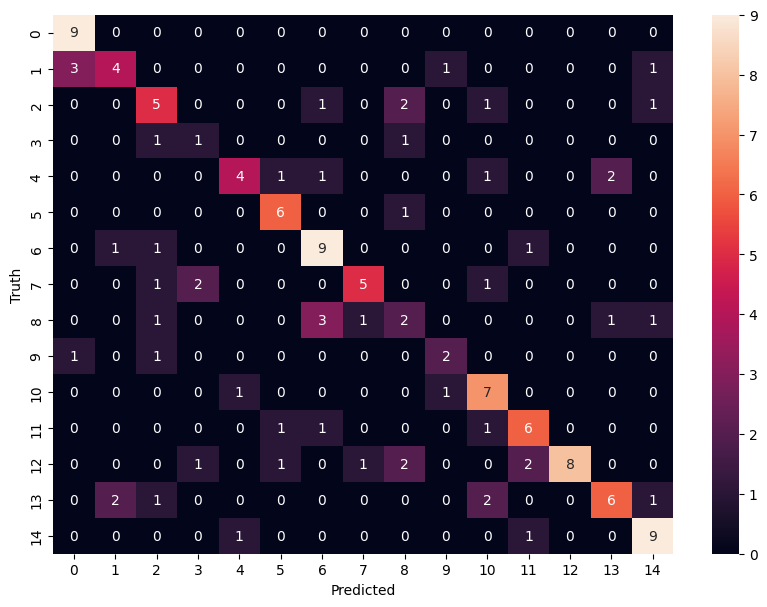

In [76]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [77]:
class_dict

{'Arshdeep Singh': 0,
 'Axar Patel': 1,
 'cropped': 2,
 'Hardik Pandya': 3,
 'Jasprit Bumrah': 4,
 'Kuldeep Yadav': 5,
 'Mohammed Siraj': 6,
 'Ravindra Jadeja': 7,
 'Rishabh Pant': 8,
 'Rohit Sharma': 9,
 'Sanju Samson': 10,
 'Shivam Dube': 11,
 'Suryakumar Yadav': 12,
 'Virat Kohli': 13,
 'Yashasvi Jaiswal': 14,
 'Yuzvendra Chahal': 15}

***Save the trained model***

In [78]:
!pip install joblib
import joblib

In [79]:
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [80]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))